# Monte Carlo Simulation of Stock Prices
In this notebook, we learn how to create a Monte Carlo Simulation of prices of a certain stock.

### Geometric Brownian Motion

Geometric Brownian Motion (GBM) is a stochastic model commonly used in finance to model stock price movements. This is also the common model employed when doing a Monte Carlo Simulation. A stochastic process follows a GBM when the following formula is satisfied: $$\frac{dS_{t}}{S_{t}}=\mu\,dt+\sigma dW_{t}$$ Where: $S_{t}$ is the stock price at time $t$, $\mu$ is the rate of return, $\sigma$ is the volatility (or sample standard deviation), and $dW_{t}$ is the change in Brownian motion. 

For the purposes of simplicity, the Brownian motion can be given as the square root of the time differential $dt$ multiplied by a random number $\epsilon$. Thus, the function above can also be written as: $$\frac{dS_{t}}{S_{t}}=\mu\,dt+\sigma \epsilon\,\sqrt{dt}$$

With GBM we can run a Monte Carlo simulation on prices of a particular stock given its historical performance. Below is the code that creates a simulation on Jollibee Food Corporation (PSE: $JFC) given its historical closing prices from 01/03/2019 to 3/31/2019. 

In [10]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import stock_data_reader as sdr 

style.use('dark_background')

start = dt.datetime(2019, 1, 3)
end = dt.datetime(2019, 3, 31)
#ticker = 'JFC'

prices = sdr.generate_df('JFC', start, end, dateObject = True)

prices = prices['amount']
returns = prices.pct_change()

last_price = prices.iloc[-1]

Getting data. This may take a while...
No data found. Either no trading or wrong ticker.
No data found. Either no trading or wrong ticker.
Data is ready.


**Note**: `stock_price_reader` is a custom Python script used to retrieve historical stock prices. More [here](https://github.com/jderrickguarin/psei_historical_data).

In [11]:
# Number of Simulations

num_simulations = 1000
num_days = 252

simulation_df = pd.DataFrame()
for i in range(num_simulations):
    count = 0
    daily_vol = returns.std() # Daily volatility
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for j in range(num_days):
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
    
    simulation_df[i] = price_series

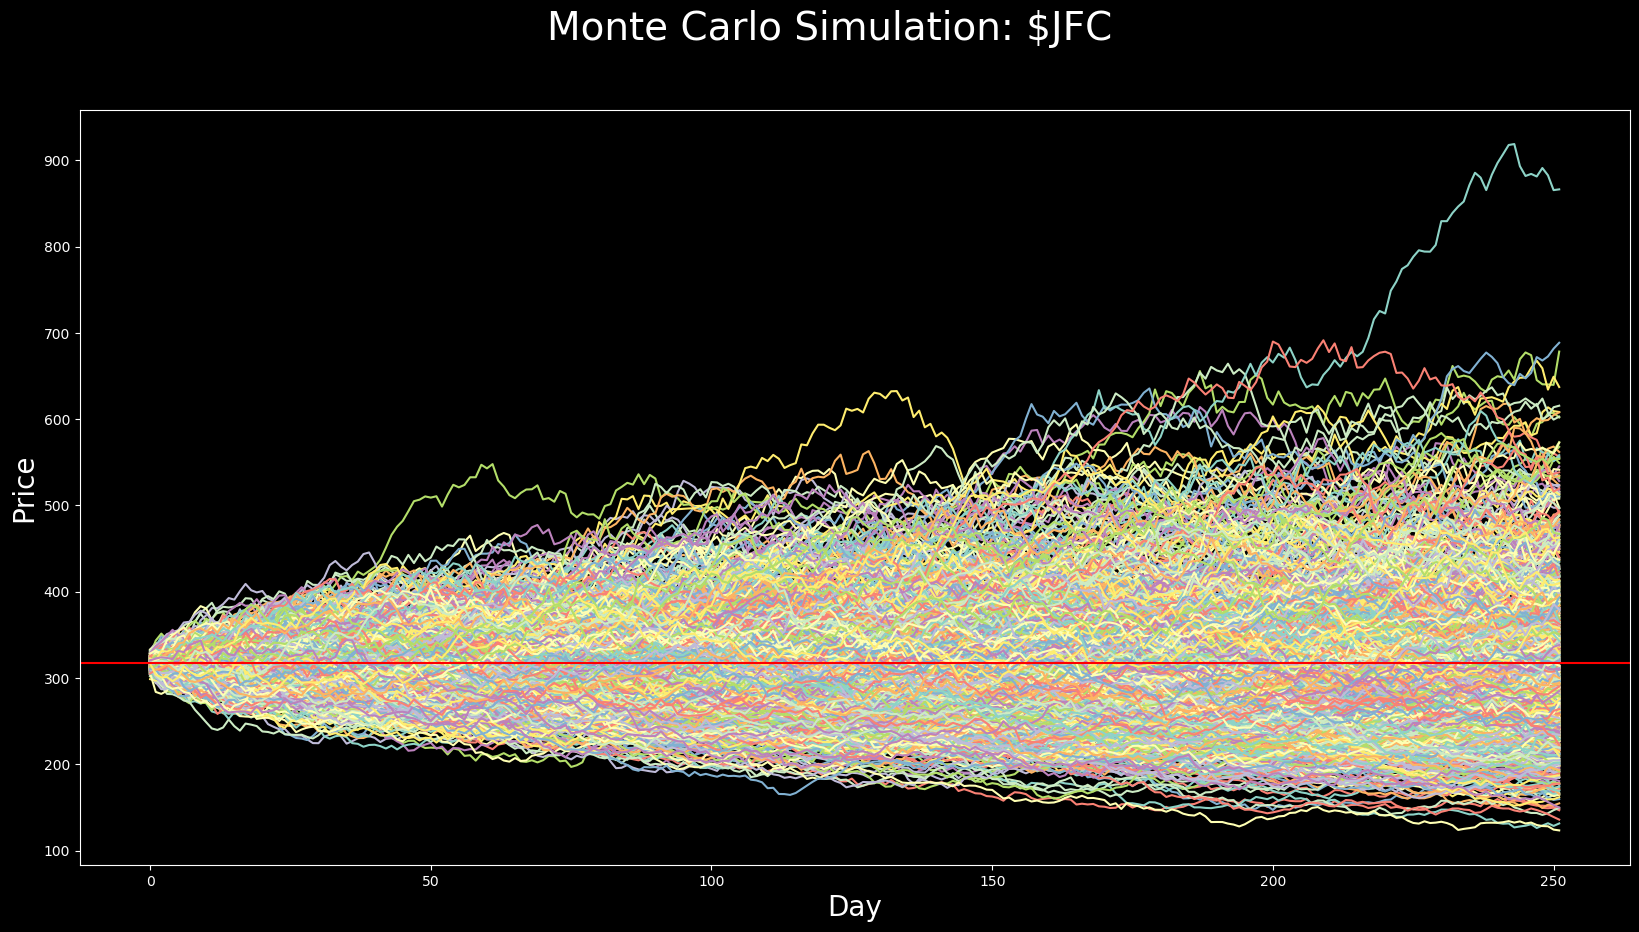

In [12]:
# Plotting 1000 simulations of JFC stock price in a 251 day horizon

fig = plt.figure(figsize=(20,10), dpi = 100)
fig.suptitle('Monte Carlo Simulation: $JFC', fontsize=28)
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

The figure above shows a 251 day horizon price movement of the JFC stock based on 1000 simulations. From this we can derive different insights like assessing risk with VaR, among many others. 

The next section focuses on ways to interpret this simulation, such as assessing the value at risk of a portfolio over a time horizon and a given confidence interval $\alpha$. A good reading can be found [here](https://www.investopedia.com/articles/07/montecarlo.asp).

## Value at Risk (VaR)


